<a href="https://colab.research.google.com/github/SergioAaron/Tiendas/blob/main/Tiendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación y limpieza de datos

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Leer el archivo de Excel
tiendas = pd.read_excel("/content/drive/MyDrive/Tiendas/MKT Science TR JR - Tiendas Departamentales 2018-2019 (1).xls")

# Mostrar las primeras filas del DataFrame
print(tiendas.head())

# El comando shape nos dice cuantos datos hay y cuantas columnas
tiendas.shape


       Fecha   Año    Mes  Semana  Medio    Sector Subsector  \
0 2018-04-01  2018  ABRIL       0  RADIO  COMERCIO   MENUDEO   
1 2018-04-01  2018  ABRIL       0  RADIO  COMERCIO   MENUDEO   
2 2018-04-01  2018  ABRIL       0  RADIO  COMERCIO   MENUDEO   
3 2018-04-01  2018  ABRIL       0  RADIO  COMERCIO   MENUDEO   
4 2018-04-01  2018  ABRIL       0  RADIO  COMERCIO   MENUDEO   

                 Categoría      Marca           Producto  ...      Agencia  \
0  TIENDAS DEPARTAMENTALES  LIVERPOOL       SORTEO MAMAS  ...  HAVAS MEDIA   
1  TIENDAS DEPARTAMENTALES  LIVERPOOL       SORTEO MAMAS  ...  HAVAS MEDIA   
2  TIENDAS DEPARTAMENTALES  LIVERPOOL       SORTEO MAMAS  ...  HAVAS MEDIA   
3  TIENDAS DEPARTAMENTALES  LIVERPOOL  TDA DEPARTAMENTAL  ...  HAVAS MEDIA   
4  TIENDAS DEPARTAMENTALES  LIVERPOOL  TDA DEPARTAMENTAL  ...  HAVAS MEDIA   

  Anunciante       Grupo              Vehículo   Género        Tipo Spot  \
0  LIVERPOOL  GRUPO ACIR  XHPOP-FM RADIO DISNE  GENERAL  ANUNCIO REGUL

(65535, 21)

In [29]:
# Limpiar el DataFrame eliminando filas duplicadas
tiendas_sin_duplicados = tiendas.drop_duplicates()

# El comando shape nos dice cuantos datos hay y cuantas columnas
tiendas_sin_duplicados.shape



(65493, 21)

In [30]:
tiendas_sin_duplicados.columns

Index(['Fecha', 'Año', 'Mes', 'Semana', 'Medio', 'Sector', 'Subsector',
       'Categoría', 'Marca', 'Producto', 'Versión', 'Agencia', 'Anunciante',
       'Grupo', 'Vehículo', 'Género', 'Tipo Spot', 'BloqueHora',
       'Inversión_Bruta', 'Inserciones', 'Duración_Seg'],
      dtype='object')

In [31]:
tiendas_sin_duplicados.dtypes

Fecha              datetime64[ns]
Año                         int64
Mes                        object
Semana                      int64
Medio                      object
Sector                     object
Subsector                  object
Categoría                  object
Marca                      object
Producto                   object
Versión                    object
Agencia                    object
Anunciante                 object
Grupo                      object
Vehículo                   object
Género                     object
Tipo Spot                  object
BloqueHora                 object
Inversión_Bruta           float64
Inserciones                 int64
Duración_Seg              float64
dtype: object

# La inversión total de la categoría en 2018 y cuánto creció porcentualmente frente al 2019

In [32]:
# ----2018----
# Calcular la inversión total de la categoría en 2018
inversion_total_2018 = tiendas_sin_duplicados.loc[tiendas_sin_duplicados['Año'] == 2018, 'Inversión_Bruta'].sum()

# ----2019----
# Calcular la inversión total de la categoría en 2019
inversion_total_2019 = tiendas_sin_duplicados.loc[tiendas_sin_duplicados['Año'] == 2019, 'Inversión_Bruta'].sum()

# Calcular la diferencia entre la inversión total de 2019 y 2018
diferencia_inversion = inversion_total_2019 - inversion_total_2018

# Calcular el porcentaje de cambio
porcentaje_cambio = (diferencia_inversion / inversion_total_2018) * 100

# Mostrar resultados
print("La inversión total de la categoría en 2018 fue: $", inversion_total_2018)
print("La inversión total de la categoría en 2019 fue: $", inversion_total_2019)
print("La diferencia de inversión entre 2019 y 2018 fue: $", diferencia_inversion)
print("El cambio porcentual en la inversión entre 2018 y 2019 fue: {:.2f}%".format(porcentaje_cambio))


La inversión total de la categoría en 2018 fue: $ 193770097.92
La inversión total de la categoría en 2019 fue: $ 268456950.71999997
La diferencia de inversión entre 2019 y 2018 fue: $ 74686852.79999998
El cambio porcentual en la inversión entre 2018 y 2019 fue: 38.54%


# Temporalidades clave de las categoría.

## Por trimestre

In [33]:
# ---2018---
# Agrupar por trimestre y sumar la inversión para el año 2018
inversion_trimestral_2018 = tiendas_sin_duplicados[tiendas_sin_duplicados['Fecha'].dt.year == 2018].groupby(tiendas_sin_duplicados['Fecha'].dt.quarter)['Inversión_Bruta'].sum()

# Mostrar los datos de inversión trimestral para el año 2018
print("Inversión Publicitaria Trimestral - 2018:")
print(inversion_trimestral_2018)

# ---2019---
# Agrupar por trimestre y sumar la inversión para el año 2019
inversion_trimestral_2019 = tiendas_sin_duplicados[tiendas_sin_duplicados['Fecha'].dt.year == 2019].groupby(tiendas_sin_duplicados['Fecha'].dt.quarter)['Inversión_Bruta'].sum()

# Mostrar los datos de inversión trimestral para el año 2019
print("Inversión Publicitaria Trimestral - 2019:")
print(inversion_trimestral_2019)


Inversión Publicitaria Trimestral - 2018:
Fecha
1    38769575.04
2    52629554.88
3    34328327.04
4    68042640.96
Name: Inversión_Bruta, dtype: float64
Inversión Publicitaria Trimestral - 2019:
Fecha
1    4.154492e+07
2    1.118310e+08
3    4.175262e+07
4    7.332843e+07
Name: Inversión_Bruta, dtype: float64


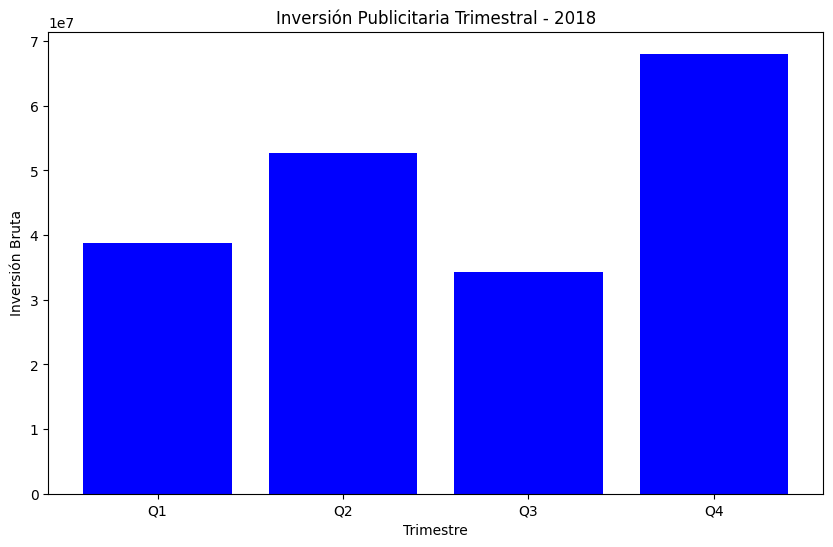

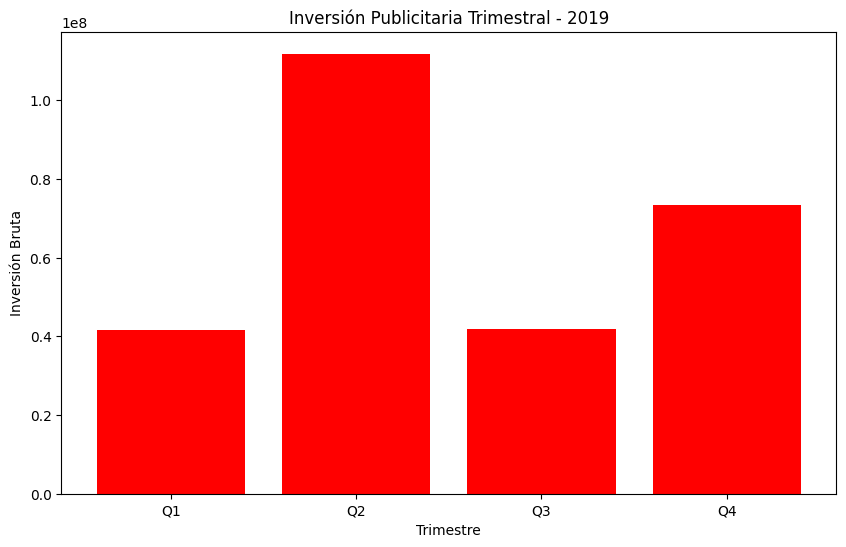

In [34]:
import matplotlib.pyplot as plt

# Agrupar por trimestre y sumar la inversión para el año 2018
inversion_trimestral_2018 = tiendas_sin_duplicados[tiendas_sin_duplicados['Fecha'].dt.year == 2018].groupby(tiendas_sin_duplicados['Fecha'].dt.quarter)['Inversión_Bruta'].sum()

# Visualizar la inversión trimestral para el año 2018
plt.figure(figsize=(10, 6))
plt.bar(range(0, 4), inversion_trimestral_2018, color='blue')
plt.title('Inversión Publicitaria Trimestral - 2018')
plt.xlabel('Trimestre')
plt.ylabel('Inversión Bruta')
plt.xticks(range(0, 4), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()

# Agrupar por trimestre y sumar la inversión para el año 2019
inversion_trimestral_2019 = tiendas_sin_duplicados[tiendas_sin_duplicados['Fecha'].dt.year == 2019].groupby(tiendas_sin_duplicados['Fecha'].dt.quarter)['Inversión_Bruta'].sum()

# Visualizar la inversión trimestral para el año 2019
plt.figure(figsize=(10, 6))
plt.bar(range(0, 4), inversion_trimestral_2019, color='red')
plt.title('Inversión Publicitaria Trimestral - 2019')
plt.xlabel('Trimestre')
plt.ylabel('Inversión Bruta')
plt.xticks(range(0, 4), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()


## Por mes

In [35]:
# Agrupar por mes y sumar la inversión para 2018
inversion_total_2018 = tiendas_sin_duplicados[tiendas_sin_duplicados['Año'] == 2018].groupby(tiendas_sin_duplicados['Fecha'].dt.month)['Inversión_Bruta'].sum()
print("Inversión Total Mensual para 2018:")
print(inversion_total_2018)

# Agrupar por mes y sumar la inversión para 2019
inversion_total_2019 = tiendas_sin_duplicados[tiendas_sin_duplicados['Año'] == 2019].groupby(tiendas_sin_duplicados['Fecha'].dt.month)['Inversión_Bruta'].sum()
print("Inversión Total Mensual para 2019:")
print(inversion_total_2019)


Inversión Total Mensual para 2018:
Fecha
1     11680511.64
2     14205331.56
3     12883731.84
4     14651070.84
5     18939327.96
6     19039156.08
7     11265527.28
8     14005093.20
9      9057706.56
10    14852726.28
11    28240658.04
12    24949256.64
Name: Inversión_Bruta, dtype: float64
Inversión Total Mensual para 2019:
Fecha
1     11194444.80
2     14463418.20
3     15887056.08
4     73967339.88
5     18132841.44
6     19730796.96
7     11903870.16
8     17568243.84
9     12280510.20
10    16479772.68
11    30983284.08
12    25865372.40
Name: Inversión_Bruta, dtype: float64


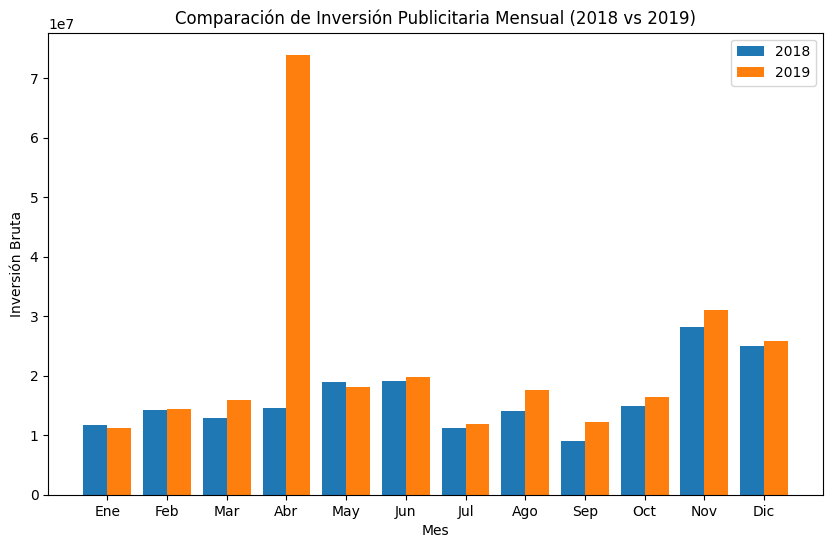

In [36]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Visualizar la inversión mensual para 2018
ax.bar(inversion_total_2018.index - 0.2, inversion_total_2018, width=0.4, label='2018')

# Visualizar la inversión mensual para 2019
ax.bar(inversion_total_2019.index + 0.2, inversion_total_2019, width=0.4, label='2019')

# Configurar título y etiquetas de ejes
ax.set_title('Comparación de Inversión Publicitaria Mensual (2018 vs 2019)')
ax.set_xlabel('Mes')
ax.set_ylabel('Inversión Bruta')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

In [37]:
# Mes con la mayor inversión para 2018
mes_max_2018 = inversion_total_2018.idxmax()
print("Mes con la mayor inversión en 2018:", mes_max_2018)

# Mes con la mayor inversión para 2019
mes_max_2019 = inversion_total_2019.idxmax()
print("Mes con la mayor inversión en 2019:", mes_max_2019)


Mes con la mayor inversión en 2018: 11
Mes con la mayor inversión en 2019: 4


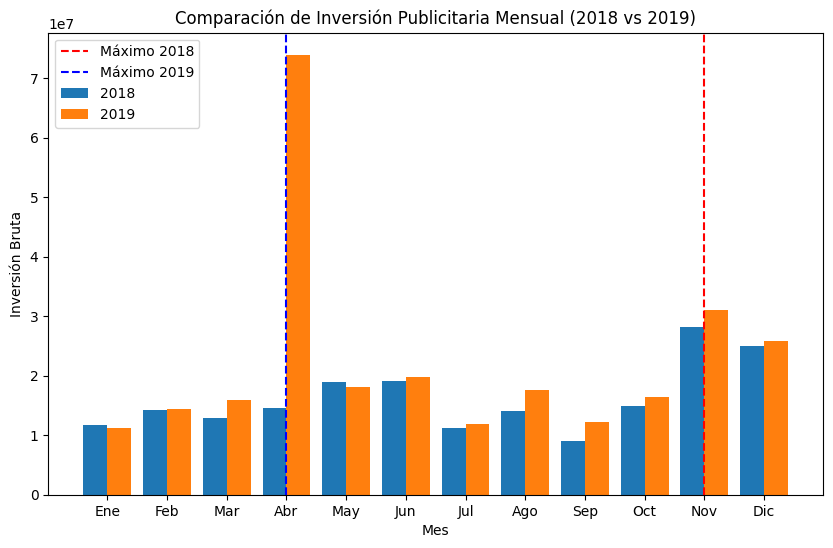

In [38]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Visualizar la inversión mensual para 2018
ax.bar(inversion_total_2018.index - 0.2, inversion_total_2018, width=0.4, label='2018')

# Visualizar la inversión mensual para 2019
ax.bar(inversion_total_2019.index + 0.2, inversion_total_2019, width=0.4, label='2019')

# Resaltar el mes con la mayor inversión para 2018
ax.axvline(x=mes_max_2018, color='red', linestyle='--', label='Máximo 2018')

# Resaltar el mes con la mayor inversión para 2019
ax.axvline(x=mes_max_2019, color='blue', linestyle='--', label='Máximo 2019')

# Configurar título y etiquetas de ejes
ax.set_title('Comparación de Inversión Publicitaria Mensual (2018 vs 2019)')
ax.set_xlabel('Mes')
ax.set_ylabel('Inversión Bruta')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

## Por semana

In [39]:
# Calcular la inversión semanal para 2018
inversion_semanal_2018 = tiendas_sin_duplicados[tiendas_sin_duplicados['Año'] == 2018].groupby(tiendas_sin_duplicados['Fecha'].dt.dayofweek)['Inversión_Bruta'].sum()

# Calcular la inversión semanal para 2019
inversion_semanal_2019 = tiendas_sin_duplicados[tiendas_sin_duplicados['Año'] == 2019].groupby(tiendas_sin_duplicados['Fecha'].dt.dayofweek)['Inversión_Bruta'].sum()

# Luego, puedes usar el código proporcionado para mostrar la inversión semanal

# Mapear números de día de la semana a nombres
nombres_dias_semana = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

# Filtrar datos por año 2018 y mostrar la inversión semanal
print("Inversión Publicitaria Semanal - 2018:")
for dia, inversion in inversion_semanal_2018.items():
    print(nombres_dias_semana[dia], ':', inversion)

# Filtrar datos por año 2019 y mostrar la inversión semanal
print("\nInversión Publicitaria Semanal - 2019:")
for dia, inversion in inversion_semanal_2019.items():
    print(nombres_dias_semana[dia], ':', inversion)


Inversión Publicitaria Semanal - 2018:
Lunes : 26533237.919999998
Martes : 18939327.959999997
Miércoles : 14005093.2
Jueves : 55329721.44
Viernes : 19039156.08
Sábado : 34006963.199999996
Domingo : 25916598.119999997

Inversión Publicitaria Semanal - 2019:
Lunes : 85871210.03999999
Martes : 27674217.48
Miércoles : 18132841.439999998
Jueves : 17568243.84
Viernes : 61333758.36
Sábado : 19730796.96
Domingo : 38145882.6


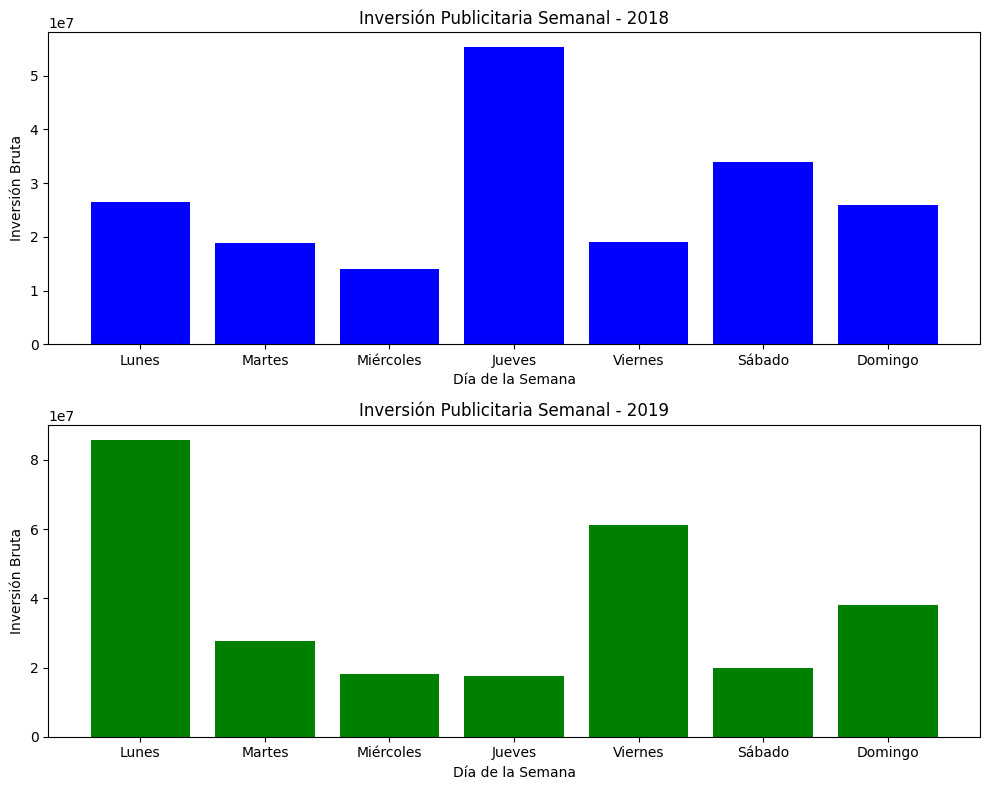

In [41]:
import matplotlib.pyplot as plt

# Crear listas de nombres de días y valores de inversión para el año 2018
nombres_dias_2018 = [nombres_dias_semana[dia] for dia in inversion_semanal_2018.index]
valores_inversion_2018 = inversion_semanal_2018.values

# Crear listas de nombres de días y valores de inversión para el año 2019
nombres_dias_2019 = [nombres_dias_semana[dia] for dia in inversion_semanal_2019.index]
valores_inversion_2019 = inversion_semanal_2019.values

# Crear una figura y ejes
fig, axs = plt.subplots(2, figsize=(10, 8))

# Graficar la inversión semanal para el año 2018
axs[0].bar(nombres_dias_2018, valores_inversion_2018, color='blue')
axs[0].set_title('Inversión Publicitaria Semanal - 2018')
axs[0].set_xlabel('Día de la Semana')
axs[0].set_ylabel('Inversión Bruta')

# Graficar la inversión semanal para el año 2019
axs[1].bar(nombres_dias_2019, valores_inversion_2019, color='green')
axs[1].set_title('Inversión Publicitaria Semanal - 2019')
axs[1].set_xlabel('Día de la Semana')
axs[1].set_ylabel('Inversión Bruta')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()


# Ranking de marcas en 2019

In [42]:
# Filtrar datos para el año 2019
datos_2019 = tiendas_sin_duplicados[tiendas_sin_duplicados['Año'] == 2019]

# Calcular la inversión total por marca en 2019
inversion_por_marca_2019 = datos_2019.groupby('Marca')['Inversión_Bruta'].sum()

# Ordenar las marcas por inversión total en orden descendente para obtener el ranking
ranking_marcas_2019 = inversion_por_marca_2019.sort_values(ascending=False)

# Mostrar el ranking de marcas en 2019
print("Ranking de Marcas en 2019:")
for i, (marca, inversion) in enumerate(ranking_marcas_2019.items(), start=1):
    print(f"{i}. {marca}: ${inversion:.2f}")

Ranking de Marcas en 2019:
1. LIVERPOOL: $152601722.28
2. SUBURBIA: $45868914.00
3. SANBORNS: $30458130.36
4. SEARS: $28842104.76
5. EL PALACIO DE HIERRO: $10686079.32


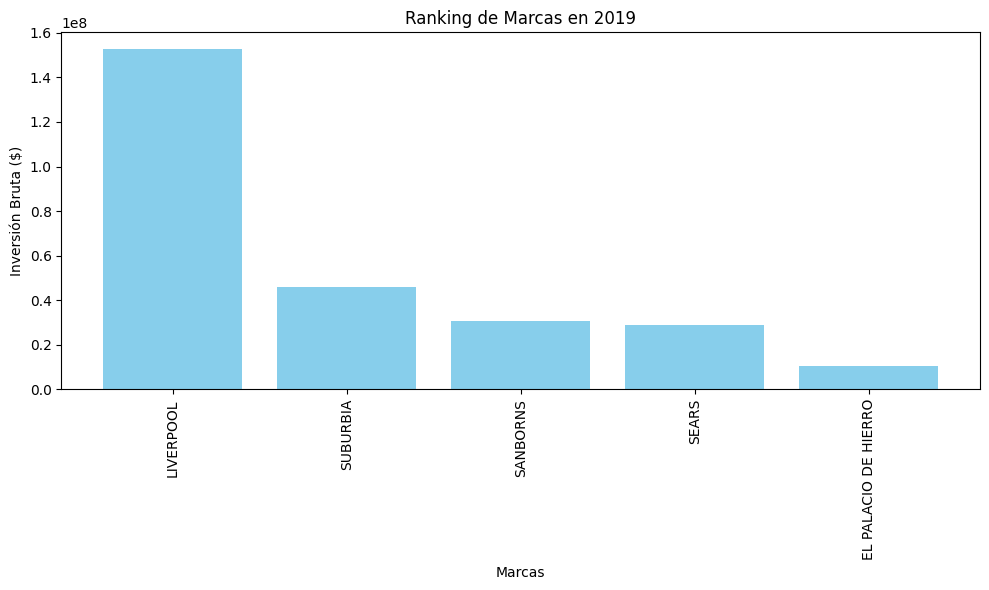

In [43]:
# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar el ranking de marcas en 2019
plt.bar(range(len(ranking_marcas_2019)), ranking_marcas_2019.values, color='skyblue')

# Configurar título y etiquetas de ejes
plt.title('Ranking de Marcas en 2019')
plt.xlabel('Marcas')
plt.ylabel('Inversión Bruta ($)')
plt.xticks(range(len(ranking_marcas_2019)), ranking_marcas_2019.index, rotation=90)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Los medios que usaron las tres marcas más importantes durante el año 2019

In [44]:
# Obtener las tres marcas más importantes
tres_marcas_mas_importantes = ranking_marcas_2019.head(3)

# Mostrar las tres marcas más importantes
print("\nTres Marcas Más Importantes en 2019:")
print(tres_marcas_mas_importantes)

# Filtrar los datos para incluir solo las tres marcas más importantes
datos_tres_marcas = datos_2019[datos_2019['Marca'].isin(tres_marcas_mas_importantes.index)]

# Calcular la inversión por medio para las tres marcas más importantes en 2019
inversion_por_medio = datos_tres_marcas.groupby(['Marca', 'Medio'])['Inversión_Bruta'].sum()

# Mostrar la inversión por medio para las tres marcas más importantes en 2019
print("\nInversión por Medio para las Tres Marcas Más Importantes en 2019:")
print(inversion_por_medio)



Tres Marcas Más Importantes en 2019:
Marca
LIVERPOOL    1.526017e+08
SUBURBIA     4.586891e+07
SANBORNS     3.045813e+07
Name: Inversión_Bruta, dtype: float64

Inversión por Medio para las Tres Marcas Más Importantes en 2019:
Marca      Medio     
LIVERPOOL  RADIO         1.181220e+08
           TV ABIERTA    9.122484e+05
           TV PAGADA     3.356752e+07
SANBORNS   RADIO         2.520432e+07
           TV ABIERTA    3.535980e+04
           TV PAGADA     5.218451e+06
SUBURBIA   PRENSA        7.489440e+03
           RADIO         3.564516e+07
           TV ABIERTA    1.893074e+05
           TV PAGADA     1.002696e+07
Name: Inversión_Bruta, dtype: float64


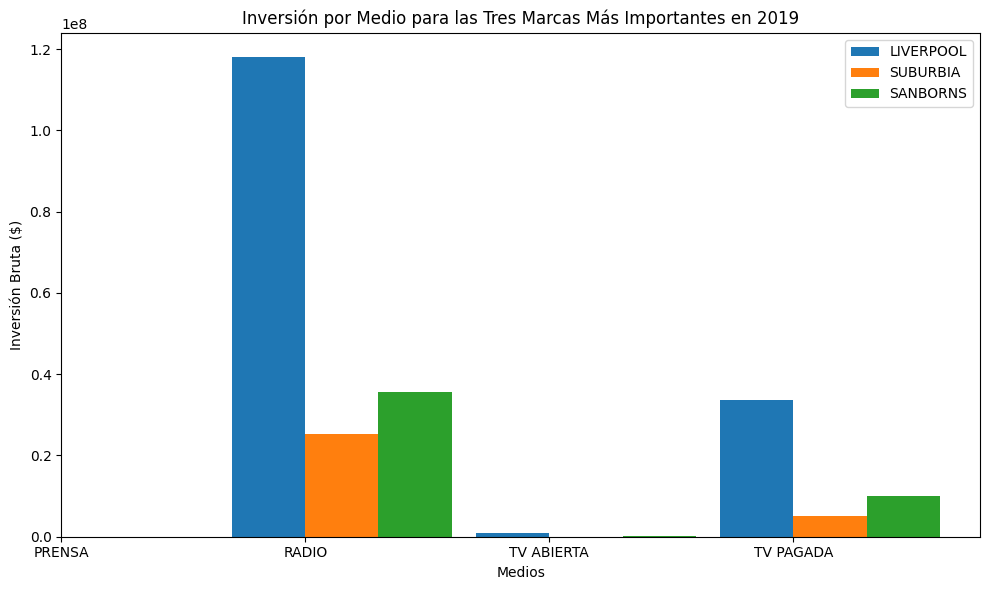

In [45]:
import numpy as np

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Obtener los nombres de los medios y las inversiones para cada marca
medios = inversion_por_medio.unstack().columns
inversiones = inversion_por_medio.unstack().values

# Configurar el ancho de las barras
bar_width = 0.3

# Calcular las posiciones de las barras para cada marca
posiciones = np.arange(len(medios))

# Graficar las barras para cada marca
for i, marca in enumerate(tres_marcas_mas_importantes.index):
    plt.bar(
        posiciones + i * bar_width,   # Posiciones de las barras para cada marca
        inversiones[i],               # Inversiones por medio para la marca actual
        width=bar_width,              # Ancho de las barras
        label=marca                   # Etiqueta de la marca
    )

# Configurar título y etiquetas de ejes
plt.title('Inversión por Medio para las Tres Marcas Más Importantes en 2019')
plt.xlabel('Medios')
plt.ylabel('Inversión Bruta ($)')
plt.xticks(posiciones + bar_width / 2, medios)  # Posicionar las etiquetas de los medios en el centro de las barras

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


# Las campañas más importantes durante el 2018

In [46]:
# Filtrar los datos para incluir solo los registros del año 2018
datos_2018 = tiendas_sin_duplicados[tiendas_sin_duplicados['Fecha'].dt.year == 2018]

# Calcular la inversión total por campaña en 2018
inversion_por_campaña_2018 = datos_2018.groupby('Producto')['Inversión_Bruta'].sum()

# Ordenar las campañas por inversión total en orden descendente para obtener las más importantes
ranking_campañas_2018 = inversion_por_campaña_2018.sort_values(ascending=False)

# Mostrar las campañas más importantes en 2018
print("Campañas más importantes en 2018:")
print(ranking_campañas_2018)


Campañas más importantes en 2018:
Producto
TDA DEPARTAMENTAL             44237099.76
VENTA NOCTURNA PROM           21714595.56
BUEN FIN PROM                 16704719.64
VENTA ESPECIAL PROM            8926622.04
VENTA DE LIQUIDACION           5201590.80
                                 ...     
TENDENCIAS BELLEZ INV PROM        8131.20
TENDENCIAS DE BELLEZA PROM        8131.20
FALLING IN FASHION PROM           6373.92
TECHNO SHOW PROM                  4712.40
FEST FRAG BELLEZA                 4712.40
Name: Inversión_Bruta, Length: 174, dtype: float64


In [47]:
# Obtener las campañas más importantes del año 2018
campañas_importantes_2018 = ranking_campañas_2018.index[:5]  # Suponiendo que tomas las 5 campañas más importantes como ejemplo

# Filtrar los datos para incluir solo los registros asociados a las campañas importantes del año 2018
datos_campañas_importantes_2018 = datos_2018[datos_2018['Producto'].isin(campañas_importantes_2018)]

# Calcular la inversión total por cada medio para estas campañas
inversion_por_medio = datos_campañas_importantes_2018.groupby('Medio')['Inversión_Bruta'].sum()

# Calcular el porcentaje de inversión que cada medio tuvo dentro del total de la inversión de la campaña
porcentaje_por_medio = (inversion_por_medio / inversion_por_medio.sum()) * 100

# Mostrar los resultados
print("Porcentaje de inversión por medio para las campañas más importantes en 2018:")
print(porcentaje_por_medio)


Porcentaje de inversión por medio para las campañas más importantes en 2018:
Medio
RADIO         99.72472
TV ABIERTA     0.27528
Name: Inversión_Bruta, dtype: float64


In [48]:
# Filtrar los datos para incluir solo los registros del año 2018 y las campañas más importantes
datos_campañas_importantes_2018 = datos_2018[datos_2018['Producto'].isin(ranking_campañas_2018.index)]

# Agrupar los datos por campaña y por medio, y sumar la inversión bruta
inversion_por_campaña_y_medio = datos_campañas_importantes_2018.groupby(['Producto', 'Medio'])['Inversión_Bruta'].sum()

# Calcular el porcentaje de inversión de cada medio dentro del total de la inversión de la campaña
porcentaje_por_campaña_y_medio = inversion_por_campaña_y_medio / inversion_por_campaña_y_medio.groupby('Producto').transform('sum') * 100


# Imprimir los resultados formateados con dos decimales
print("Porcentaje de inversión por medio para las campañas más importantes en 2018:")
print(porcentaje_por_campaña_y_medio.apply(lambda x: '{:.2f}%'.format(x)))


# Calcular el porcentaje de inversión de cada medio dentro del total de la inversión de la campaña
porcentaje_por_campaña_y_medio = (inversion_por_campaña_y_medio / inversion_por_campaña_y_medio.groupby('Producto').transform('sum') * 100).round(2)



Porcentaje de inversión por medio para las campañas más importantes en 2018:
Producto                    Medio     
ADELANTATE MUNDIAL PROM     RADIO         100.00%
ANIVERSARIO PROM            RADIO          99.53%
                            TV ABIERTA      0.47%
ANO NUEVO TODO NUEVO PROM   RADIO         100.00%
AQUI GOLEAS TU PROM         RADIO         100.00%
                                           ...   
VENTA QUINCEN AGUINAL PROM  RADIO         100.00%
VIVA BONITO                 RADIO         100.00%
VIVA MEXICO PROM            RADIO         100.00%
VTA PRE NAVIDENA PROM       RADIO          99.16%
                            TV ABIERTA      0.84%
Name: Inversión_Bruta, Length: 190, dtype: object


# Tv abierta

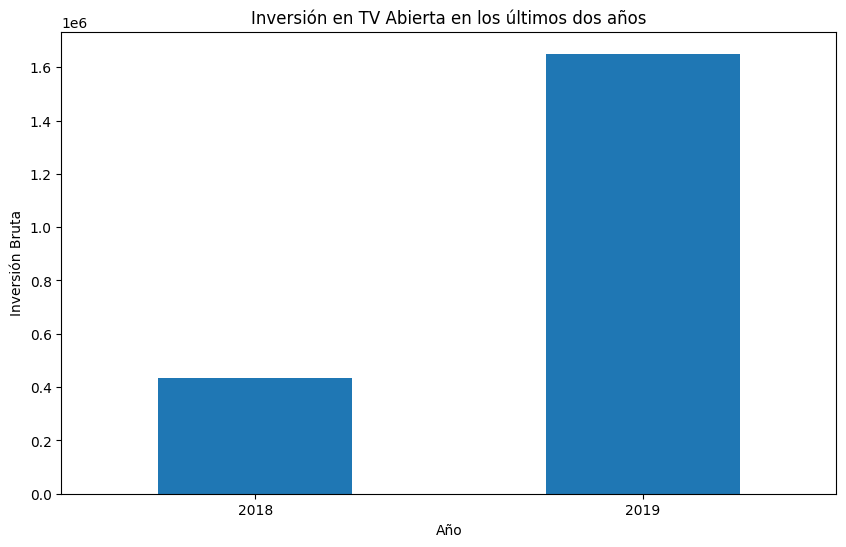

In [49]:
# Filtrar los datos para incluir solo los registros de inversión en TV Abierta
datos_tv_abierta = tiendas_sin_duplicados[tiendas_sin_duplicados['Medio'] == 'TV ABIERTA']

# Agrupar los datos por año y sumar la inversión bruta para cada año
inversion_por_año = datos_tv_abierta.groupby(datos_tv_abierta['Fecha'].dt.year)['Inversión_Bruta'].sum()

# Visualizar la tendencia de la inversión en TV Abierta en los últimos dos años
inversion_por_año[-2:].plot(kind='bar', figsize=(10, 6))
plt.title('Inversión en TV Abierta en los últimos dos años')
plt.xlabel('Año')
plt.ylabel('Inversión Bruta')
plt.xticks(rotation=0)
plt.show()


In [50]:
# Obtener los top 3 de anunciantes para 2018 y 2019
top_3_anunciantes_2018 = datos_2018.groupby('Anunciante')['Inversión_Bruta'].sum().nlargest(3).index
top_3_anunciantes_2019 = datos_2019.groupby('Anunciante')['Inversión_Bruta'].sum().nlargest(3).index

# Filtrar los datos para incluir solo los registros de los top 3 de anunciantes para cada año
datos_top_3_2018 = datos_2018[datos_2018['Anunciante'].isin(top_3_anunciantes_2018)]
datos_top_3_2019 = datos_2019[datos_2019['Anunciante'].isin(top_3_anunciantes_2019)]

# Agrupar los datos por año y anunciantes y sumar la inversión bruta para cada canal
inversion_por_anunciante_y_canal_2018 = datos_top_3_2018.groupby(['Anunciante', 'Vehículo'])['Inversión_Bruta'].sum()
inversion_por_anunciante_y_canal_2019 = datos_top_3_2019.groupby(['Anunciante', 'Vehículo'])['Inversión_Bruta'].sum()

# Identificar los canales más importantes para cada uno de los top 3 de anunciantes en cada año
canales_importantes_2018 = inversion_por_anunciante_y_canal_2018.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)
canales_importantes_2019 = inversion_por_anunciante_y_canal_2019.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)

# Mostrar los resultados
print("Canales más importantes para el top 3 de anunciantes en 2018:")
print(canales_importantes_2018)
print("\nCanales más importantes para el top 3 de anunciantes en 2019:")
print(canales_importantes_2019)


Canales más importantes para el top 3 de anunciantes en 2018:
Anunciante         Vehículo           
LIVERPOOL          XHSON-FM BEAT 100.9    14956538.52
SANBORNS HERMANOS  XHSH-FM AMOR 95.3       6121516.80
SUBURBIA           XHEXA-FM EXA FM         7530737.76
Name: Inversión_Bruta, dtype: float64

Canales más importantes para el top 3 de anunciantes en 2019:
Anunciante         Vehículo           
LIVERPOOL          XHSON-FM BEAT 100.9    20296185.00
SANBORNS HERMANOS  XHEXA-FM EXA FM         3685863.72
SUBURBIA           XHDFM-FM 106.5 MIX      6502858.32
Name: Inversión_Bruta, dtype: float64
